In [1]:
# -------- import all the module --------
import speasy as spz
import time
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import math
import pandas as pd 
import import_ipynb
import SerPyShock as SP
import functions as func
%matplotlib widget

In [2]:
# -------------- importing database ------------
amda_tree = spz.inventories.tree.amda

cda_tree = spz.inventories.tree.cda

ssc_tree = spz.inventories.tree.ssc

#### Input

In [3]:
#=============== input date, time in second of the shock and period of time to show before and after the shock =========
# DD/MM/YYYY
date = ['06','05','2015']

# HH, MM, SS in SW
t1 = ['00','55','00']

# HH, MM, SS in msh
t3 = ['01', '40', '40']

# input name of the spacecraft in msh
name_spacecraft_msh = 'THE'

# index shock for chris
index = '15'

# time observed before and after the shock in SW and msh
time_obs = 20

#name of the file you want to create/ save the data in
name_file = 'data_shock.json'

# Information satellite SW

In [4]:
# calcul good format date
day = int(date[0])
month = int(date[1])
year = int(date[2])

# calcul good format date for Chris
form_date = date[0] +'/'+ date[1] +'/'+ date[2]

# calcul good format time for chris 
form_t1_chris = [int(t1[0]), int(t1[1]), int(t1[2])]

# calcul good format time for SW
time_val_SW = t1[0] + ':' + t1[1] + ':' + t1[2]

start_date_SW, end_date_SW, time_shock_SW = func.find_time(day,month,year,time_val_SW,time_obs)

# ---------- input spacecraft name ----------
name_spacecraft_SW = "WIND"

# ----- Variable defined for the multiple averaging windows -----
# =========== change the value for the averaging windows ==================
up_shk_SW = time_shock_SW - timedelta(minutes = 5)
dw_shk_SW = time_shock_SW + timedelta(minutes = 5)
min_up_dur_SW = timedelta(minutes = 3)
max_up_dur_SW = timedelta(minutes = 10)
min_dw_dur_SW = timedelta(minutes = 3)
max_dw_dur_SW = timedelta(minutes = 10)
tcad_SW = timedelta(seconds = 10)

# Define the list of time up and down for our averaging range
time_up_SW = (time_shock_SW - max_up_dur_SW, up_shk_SW)
time_down_SW = (dw_shk_SW, time_shock_SW + max_dw_dur_SW)

#define variable to plot the minimum and maximum windows
up_window_SW = (up_shk_SW - min_up_dur_SW,up_shk_SW - max_up_dur_SW)
down_window_SW = (dw_shk_SW + min_dw_dur_SW, dw_shk_SW + max_dw_dur_SW)

## Get data MAGNETIC FIELD 

In [5]:
# -------- get the data --------
time_mag_SW, B_SW, B_unit_SW, Bx_SW, By_SW, Bz_SW, B_up_SW, B_down_SW = func.get_Bfield(name_spacecraft_SW, start_date_SW, end_date_SW, time_up_SW, time_down_SW)

#func.get_coordinate(name_spacecraft)

Bx_SW = [b_SW[0] for b_SW in B_SW]
By_SW = [b_SW[1] for b_SW in B_SW]
Bz_SW = [b_SW[2] for b_SW in B_SW]

# ----- Variable defined for the multiple averaging windows -----
datetime_objects_SW = pd.to_datetime(time_mag_SW)
freq = 'ns'
datetime_index_SW = pd.DatetimeIndex(datetime_objects_SW).floor(freq)


# =========== Defining the averaging windows for B_up, B_down ===========================
# -------------- filtered the value of magnetic field for the defined window range ---------------
filtered_Bx_up_SW,filtered_By_up_SW,filtered_Bz_up_SW = func.filtered_B_up(time_mag_SW, Bx_SW, By_SW, Bz_SW, time_up_SW)
filtered_Bx_down_SW, filtered_By_down_SW, filtered_Bz_down_SW = func.filtered_B_down(time_mag_SW, Bx_SW, By_SW, Bz_SW, time_down_SW)

# ================== calculate average upstream and downstream for bx, by, bz ==========================
# ------------ calculate uncertainty for magnetic field --------------------
uncertainty_Bx_up_SW = np.std(filtered_Bx_up_SW)
uncertainty_Bx_down_SW = np.std(filtered_Bx_down_SW)
uncertainty_By_up_SW = np.std(filtered_By_up_SW)
uncertainty_By_down_SW = np.std(filtered_By_down_SW)
uncertainty_Bz_up_SW = np.std(filtered_Bz_up_SW)
uncertainty_Bz_down_SW = np.std(filtered_Bz_down_SW)

Bx_up_SW, Bx_down_SW, By_up_SW, By_down_SW, Bz_up_SW, Bz_down_SW =func.calculate_average(filtered_Bx_up_SW,filtered_Bx_down_SW,filtered_By_up_SW,filtered_By_down_SW,filtered_Bz_up_SW,filtered_Bz_down_SW)
#create a vector B for an averaging window
list_B_up_SW = [Bx_up_SW, By_up_SW, Bz_up_SW]
list_B_down_SW = [Bx_down_SW, By_down_SW, Bz_down_SW]

vector_B_up_SW = np.array(list_B_up_SW)
vector_B_down_SW = np.array(list_B_down_SW)

## Get data VELOCITY 

In [6]:
# Get data for velocity
time_velo_SW, V_SW, V_unit_SW, Vx_SW, Vy_SW, Vz_SW, V_up_SW, V_down_SW = func.get_velocity(name_spacecraft_SW, start_date_SW, end_date_SW, time_up_SW, time_down_SW)

Vx_SW = [v_SW[0] for v_SW in V_SW]
Vy_SW = [v_SW[1] for v_SW in V_SW]
Vz_SW = [v_SW[2] for v_SW in V_SW]

# ================= Defining the averaging windows for V_up, V_down =================
# ----------------------- filtered the velocity for the window range ---------------------
filtered_Vx_up_SW, filtered_Vy_up_SW, filtered_Vz_up_SW = func.filtered_V_up(time_velo_SW,Vx_SW, Vy_SW, Vz_SW,time_up_SW)
filtered_Vx_down_SW, filtered_Vy_down_SW, filtered_Vz_down_SW = func.filtered_V_down(time_velo_SW,Vx_SW, Vy_SW, Vz_SW,time_down_SW)

# ==================== Calculating the average upstream and downstream of Vx, Vy, Vz ====================
from scipy.interpolate import interp1d
data_SW = V_SW

# Number of indexes to extend
num_indexes_SW = np.shape(B_SW)[0]

# Generate an array of indices
indices_SW = np.arange(data_SW.shape[0])

# Interpolate each column separately
interpolated_data_V_SW = np.empty((num_indexes_SW, data_SW.shape[1]))
for col in range(data_SW.shape[1]):
    interpolator_SW = interp1d(indices_SW, data_SW[:, col], kind='cubic')
    interpolated_data_V_SW[:, col] = interpolator_SW(np.linspace(0, indices_SW[-1], num_indexes_SW))
    
# ------------- calculate uncertainty for velocity ------------
uncertainty_Vx_up_SW = np.std(filtered_Vx_up_SW)
uncertainty_Vx_down_SW = np.std(filtered_Vx_down_SW)
uncertainty_Vy_up_SW = np.std(filtered_Vy_up_SW)
uncertainty_Vy_down_SW = np.std(filtered_Vy_down_SW)
uncertainty_Vz_up_SW = np.std(filtered_Vz_up_SW)
uncertainty_Vz_down_SW = np.std(filtered_Vz_down_SW)

Vx_up_SW, Vx_down_SW, Vy_up_SW, Vy_down_SW, Vz_up_SW, Vz_down_SW = func.calculate_average(filtered_Vx_up_SW,filtered_Vx_down_SW,filtered_Vy_up_SW,filtered_Vy_down_SW,filtered_Vz_up_SW,filtered_Vz_down_SW)

#create a vector V for a defined range 
list_V_up_SW = [Vx_up_SW, Vy_up_SW, Vz_up_SW]
list_V_down_SW = [Vx_down_SW, Vy_down_SW, Vz_down_SW]

vector_V_up_SW = np.array(list_V_up_SW)
vector_V_down_SW = np.array(list_V_down_SW)

## Get data density

In [7]:
# -------- get the data for the density --------
time_rho_SW, density_SW, density_unit_SW, density_up_SW, density_down_SW = func.get_density(name_spacecraft_SW, start_date_SW, end_date_SW, time_up_SW, time_down_SW)

Rho_SW = [Density_SW[0] for Density_SW in density_SW]

# =================== Defining the averaging windows for n_up, n_down =====================
filtered_density_up_SW = func.filtered_N_up(time_rho_SW,Rho_SW,time_up_SW)
filtered_density_down_SW = func.filtered_N_down(time_rho_SW,Rho_SW,time_down_SW)

# ----- calculate uncertainty density -----
uncertainty_density_x_up_SW = np.std(filtered_density_up_SW)
uncertainty_density_x_down_SW = np.std(filtered_density_down_SW)

# ------- Make an array with the data --------
indices_density_SW = np.linspace(0, len(density_SW) - 1, num=len(density_SW))

new_indices_density_SW = np.linspace(0, len(density_SW) - 1, num=np.shape(B_SW)[0])

original_data_flat_SW = np.ravel(density_SW)
indices_flat_SW = np.ravel(indices_density_SW)

extended_density_SW = np.interp(new_indices_density_SW, indices_flat_SW, original_data_flat_SW)

# Reshape extended_density
extended_density_reshaped_SW = extended_density_SW.reshape((np.shape(B_SW)[0], 1))

## Infos needed for Chris

In [8]:
# -------------- find the coordinates of the satellite ----------------
S1 = func.get_coordinate(name_spacecraft_SW,time_shock_SW)[0]
print("")

# -------------- calculate average values for B ----------------
print("Average B values: ")
Bx_up_SW, Bx_down_SW, By_up_SW, By_down_SW, Bz_up_SW, Bz_down_SW = func.calculate_average(filtered_Bx_up_SW,filtered_Bx_down_SW,filtered_By_up_SW,filtered_By_down_SW,filtered_Bz_up_SW,filtered_Bz_down_SW)

print("Bx up: ", Bx_up_SW, "±",uncertainty_Bx_up_SW)
print("Bx down: ", Bx_down_SW, "±",uncertainty_Bx_down_SW)
print("By up: ", By_up_SW, "±",uncertainty_By_up_SW)
print("By down: ", By_down_SW, "±",uncertainty_By_down_SW)
print("Bz up: ", Bz_up_SW, "±",uncertainty_Bz_up_SW)
print("Bz down: ", Bz_down_SW, "±",uncertainty_Bz_down_SW)
print("")



# --------------- calculate average values for V --------------------
print("Average V values: ")
Vx_up_SW, Vx_down_SW, Vy_up_SW, Vy_down_SW, Vz_up_SW, Vz_down_SW = func.calculate_average(filtered_Vx_up_SW,filtered_Vx_down_SW,filtered_Vy_up_SW,filtered_Vy_down_SW,filtered_Vz_up_SW,filtered_Vz_down_SW)

print("Vx up: ",Vx_up_SW, "±",uncertainty_Vx_up_SW)
print("Vx down: ",Vx_down_SW, "±",uncertainty_Vx_down_SW)
print("Vy up: ",Vy_up_SW, "±",uncertainty_Vx_up_SW)
print("Vy down: ",Vy_down_SW, "±",uncertainty_Vx_down_SW)
print("Vz up: ",Vz_up_SW, "±",uncertainty_Vx_up_SW)
print("Vz down: ",Vz_down_SW, "±",uncertainty_Vx_down_SW)
print("")


# ----------------- Calculate the average value for n ------------------
density_up_mean_SW = sum(filtered_density_up_SW) / len(filtered_density_up_SW)
density_down_mean_SW = sum(filtered_density_down_SW) / len(filtered_density_down_SW)

print("Average density up:", density_up_mean_SW, "±",uncertainty_density_x_up_SW )
print("Average density down:", density_down_mean_SW, "±",uncertainty_density_x_down_SW)

the time is: ['2015-05-06T00:50:00.000000000']
the satellite coordinate are: [[237.92738659 -91.97729899  13.63589939]]

Average B values: 
Bx up:  -0.07731772269999998 ± 0.697921185000367
Bx down:  -2.6230698600000006 ± 0.9143117948005705
By up:  5.448952800000001 ± 0.21465559800797182
By down:  11.541588699999998 ± 2.241736777857586
Bz up:  2.2171059999999994 ± 0.4614582840062577
Bz down:  4.49005905 ± 2.8741058822700825

Average V values: 
Vx up:  -382.7726666666667 ± 2.500474666049538
Vx down:  -453.29333333333335 ± 4.6949705241058055
Vy up:  -30.7099 ± 2.500474666049538
Vy down:  -47.396166666666666 ± 4.6949705241058055
Vz up:  -9.55708 ± 2.500474666049538
Vz down:  -23.1811 ± 4.6949705241058055

Average density up: 4.61935 ± 0.4210657631138713
Average density down: 12.402133333333333 ± 0.7471596408324586


## Calculating normal and velocity with one window

In [9]:
# ======================== Computing the normals: MC, VC, MX1, MX2, MX3 =========================

# ---------- define cross product --------
delta_B_SW = (vector_B_up_SW) - (vector_B_down_SW)

delta_V_SW = (vector_V_up_SW) - (vector_V_down_SW)

B_up_cross_B_down_SW = np.cross(vector_B_up_SW, vector_B_down_SW)

delta_V_cross_B_up_SW = np.cross(delta_V_SW, vector_B_up_SW)

delta_V_cross_B_down_SW = np.cross(delta_V_SW, vector_B_down_SW)

delta_V_cross_delta_B_SW = np.cross(delta_V_SW, delta_B_SW)



# -------- calculate and print normal with MC method --------
normal_MC_SW = -(np.cross(B_up_cross_B_down_SW,-delta_B_SW)) / (func.magnitude((np.cross(B_up_cross_B_down_SW,-delta_B_SW))))

Bu_dot_nMC_SW = np.dot(-vector_B_up_SW,normal_MC_SW)

tbn_MC_SW = np.arccos(Bu_dot_nMC_SW / (np.linalg.norm(vector_B_up_SW)))*180/np.pi
if tbn_MC_SW > 90:
        tbn_MC_SW = 180 -tbn_MC_SW
        
# -------- calculate and print normal with VC method --------    
n_VC_SW = -(delta_V_SW) / func.magnitude(delta_V_SW)

Bu_dot_nVC_SW = np.dot(-vector_B_up_SW,n_VC_SW)

tbn_VC_SW = np.arccos(Bu_dot_nVC_SW / (np.linalg.norm(vector_B_up_SW)))*180/np.pi
if tbn_VC_SW > 90:
        tbn_VC_SW = 180 -tbn_VC_SW
        
# -------- calculate print normal with MX1 method --------
n_MX1_SW = -np.cross(delta_V_cross_B_up_SW, delta_B_SW) / func.magnitude(np.cross(delta_V_cross_B_up_SW, delta_B_SW))

Bu_dot_nMX1_SW = np.dot(-vector_B_up_SW,n_MX1_SW)

tbn_MX1_SW = np.arccos(Bu_dot_nMX1_SW / (np.linalg.norm(vector_B_up_SW)))*180/np.pi
if tbn_MX1_SW > 90:
        tbn_MX1_SW = 180 -tbn_MX1_SW

# -------- calculate print normal with MX2 method --------
n_MX2_SW = -np.cross(delta_V_cross_B_down_SW, delta_B_SW) / func.magnitude(np.cross(delta_V_cross_B_down_SW, delta_B_SW))

Bu_dot_nMX2_SW = np.dot(-vector_B_up_SW,n_MX2_SW)

tbn_MX2_SW = np.arccos(Bu_dot_nMX2_SW / (np.linalg.norm(vector_B_up_SW)))*180/np.pi
if tbn_MX2_SW > 90:
        tbn_MX2_SW = 180 -tbn_MX2_SW
         
# -------- calculate print normal with MX3 method --------
n_MX3_SW = np.cross(-delta_B_SW, delta_V_cross_delta_B_SW) / func.magnitude(np.cross(delta_B_SW, delta_V_cross_delta_B_SW))

Bu_dot_nMX3_SW = np.dot(-vector_B_up_SW,n_MX3_SW)

tbn_MX3_SW = np.arccos(Bu_dot_nMX3_SW / (np.linalg.norm(vector_B_up_SW)))*180/np.pi
if tbn_MX3_SW > 90:
        tbn_MX3_SW = 180 -tbn_MX3_SW
        
        
# ------------- print the method ------------
print("normal MC:", normal_MC_SW, tbn_MC_SW)
print("normal VC:", n_VC_SW, tbn_VC_SW)
print("normal MX1:", n_MX1_SW, tbn_MX1_SW)
print("normal MX2:", n_MX2_SW, tbn_MX2_SW)
print("normal MX3:", n_MX3_SW, tbn_MX3_SW)
print("")

# ======================= Calcul velocity of shock ===================
# --------------- calculate the velocity of the shock ---------------
velocity_SW = []
velocity_SW.append(abs(np.dot(np.subtract((density_down_mean_SW * vector_V_down_SW),(density_up_mean_SW * vector_V_up_SW))/(density_down_mean_SW - density_up_mean_SW), normal_MC_SW)))
velocity_SW.append(abs(np.dot(np.subtract((density_down_mean_SW * vector_V_down_SW),(density_up_mean_SW * vector_V_up_SW))/(density_down_mean_SW - density_up_mean_SW), n_VC_SW)))
velocity_SW.append(abs(np.dot(np.subtract((density_down_mean_SW * vector_V_down_SW),(density_up_mean_SW * vector_V_up_SW))/(density_down_mean_SW - density_up_mean_SW), n_MX1_SW)))
velocity_SW.append(abs(np.dot(np.subtract((density_down_mean_SW * vector_V_down_SW),(density_up_mean_SW * vector_V_up_SW))/(density_down_mean_SW - density_up_mean_SW), n_MX2_SW)))
velocity_SW.append(abs(np.dot(np.subtract((density_down_mean_SW * vector_V_down_SW),(density_up_mean_SW * vector_V_up_SW))/(density_down_mean_SW - density_up_mean_SW), n_MX3_SW)))

# ----------------- print the velocity of the shock ---------------
print('method MC: ', round(velocity_SW[0],2))
print('Method VC: ',round(velocity_SW[1],2))
print('Method MX1:',round(velocity_SW[2],2))
print('Method MX2: ',round(velocity_SW[3],2))
print('MEthod MX3: ',round(velocity_SW[4],2))

normal MC: [0.927968   0.31133841 0.20480182] 69.30825952032582
normal VC: [-0.95637532 -0.22629301 -0.18476394] 74.53510267892425
normal MX1: [-0.92706027 -0.30717246 -0.21495196] 69.30957099763037
normal MX2: [-0.9270419  -0.30709282 -0.21514485] 69.30962138137548
normal MX3: [-0.9270269  -0.30702789 -0.21530212] 69.30966316431288

method MC:  483.73
Method VC:  492.29
Method MX1: 483.36
Method MX2:  483.35
MEthod MX3:  483.34


## Compute normal and velocity with the Trotta code

In [10]:
# =============== calculating the normal =================
# ---- calculate the normal with MC ------
MC_SW = SP.calc_MC(vector_B_up_SW, vector_B_down_SW,"GSE")
print("Normal with MC method: ", MC_SW)
# ---- calculate the normal with MX1 ------
MX1_SW = SP.calc_MX1(vector_B_up_SW, vector_B_down_SW ,vector_V_up_SW , vector_V_down_SW, "GSE")
print("Normal with MX1 method: ", MX1_SW)
# ---- calculate the normal with MX2 ------
MX2_SW = SP.calc_MX2(vector_B_up_SW, vector_B_down_SW, vector_V_up_SW, vector_V_down_SW,"GSE")
print("Normal with MX2 method:", MX2_SW)
# ---- calculate the normal with MX3 ------
MX3_SW = SP.calc_MX3(vector_B_up_SW, vector_B_down_SW, vector_V_up_SW, vector_V_down_SW, "GSE")
print("Normal with MX3 method:", MX3_SW)
print("")


# ======================= Calculating the normal with multiple averaging windows =======================
from datetime import datetime, timedelta
# -------- calculate the normal with averaging windows --------
n_SW, tbn_SW, rB_SW, ex_SW = SP.MX_stats(datetime_index_SW, B_SW, datetime_index_SW, interpolated_data_V_SW, time_shock_SW, up_shk_SW, dw_shk_SW, min_up_dur_SW, max_up_dur_SW, min_dw_dur_SW, max_dw_dur_SW, tcad_SW, "GSE")
print("")

# -------- calculate and compare the average of the normal from Trotta --------
mean_values_normal_SW = []

mean_values_normal_SW.append(np.nanmean(n_SW.MC, axis=0))
mean_values_normal_SW.append(np.nanmean(n_SW.MX1, axis=0))
mean_values_normal_SW.append(np.nanmean(n_SW.MX2, axis=0))
mean_values_normal_SW.append(np.nanmean(n_SW.MX3, axis=0))

# ----- calculate uncertainty in normal -------
uncertainty_MC_SW = np.std(n_SW.MC, axis=0)
uncertainty_MX1_SW = np.std(n_SW.MX1, axis=0)
uncertainty_MX2_SW = np.std(n_SW.MX2, axis=0)
uncertainty_MX3_SW = np.std(n_SW.MX3, axis=0)

# ----- calculate normal of shock ------
print('Method MC:',mean_values_normal_SW[0], "±",uncertainty_MC_SW)
print('Method MX1:',mean_values_normal_SW[1],"±",uncertainty_MX1_SW)
print('Method MX2:',mean_values_normal_SW[2],"±",uncertainty_MX2_SW)
print('Method MX3:',mean_values_normal_SW[3],"±",uncertainty_MX3_SW)
print("")

# ==================== calculating the velocity ===============
# -------- define the variable for the code --------
def calculate_velocity(n_SW):

    V_SW = interpolated_data_V_SW
    Rho_SW = extended_density_reshaped_SW
    vsh_SW, ex_SW = SP.Vsh_stats(n_SW, datetime_index_SW, V_SW, Rho_SW, time_shock_SW, up_shk_SW, dw_shk_SW, min_up_dur_SW, max_up_dur_SW, min_dw_dur_SW, max_dw_dur_SW, tcad_SW)
    
    return vsh_SW, ex_SW

print("Velocity for MC")
V_MC_SW = calculate_velocity(mean_values_normal_SW[0])[0]
print("")

print("Velocity for MX1")
V_MX1_SW = calculate_velocity(mean_values_normal_SW[1])[0]
print("")

print("Velocity for MX2")
V_MX2_SW = calculate_velocity(mean_values_normal_SW[2])[0]
print("")

print("Velocity for MX3")
V_MX3_SW = calculate_velocity(mean_values_normal_SW[3])[0]
print("")

# ---- calculate uncertainty velocity ------
uncertainty_velocity_MC_SW = np.std(V_MC_SW)
uncertainty_velocity_MX1_SW = np.std(V_MX1_SW)
uncertainty_velocity_MX2_SW = np.std(V_MX2_SW)
uncertainty_velocity_MX3_SW = np.std(V_MX3_SW)

# ----- calculate the velocity of the shock -------
mean_values_velocity_SW = []

mean_values_velocity_SW.append(np.nanmean(V_MC_SW))
mean_values_velocity_SW.append(np.nanmean(V_MX1_SW))
mean_values_velocity_SW.append(np.nanmean(V_MX2_SW))
mean_values_velocity_SW.append(np.nanmean(V_MX3_SW))

print("Speed velocity MC", round(mean_values_velocity_SW[0],2), "±",round(uncertainty_velocity_MC_SW,2))
print("Speed velocity MX1",round(mean_values_velocity_SW[1],2),"±",round(uncertainty_velocity_MX1_SW,2))
print("Speed velocity MX2",round(mean_values_velocity_SW[2],2),"±",round(uncertainty_velocity_MX2_SW,2))
print("Speed velocity MX3",round(mean_values_velocity_SW[3],2),"±",round(uncertainty_velocity_MX3_SW,2))

Normal with MC method:  (array([-0.927968  , -0.31133841, -0.20480182]), 69.30825952032582)
Normal with MX1 method:  (array([-0.92706027, -0.30717246, -0.21495196]), 69.30957099763037)
Normal with MX2 method: (array([-0.9270419 , -0.30709282, -0.21514485]), 69.30962138137546)
Normal with MX3 method: (array([-0.9270269 , -0.30702789, -0.21530212]), 69.30966316431287)


Method MC: [-0.85926571 -0.25133765 -0.37564421] ± [0.05071758 0.0976019  0.21280238]
Method MX1: [-0.93231156 -0.31547213 -0.17382808] ± [0.01017581 0.01954742 0.0238882 ]
Method MX2: [-0.93251547 -0.31558032 -0.17260934] ± [0.01014525 0.01884578 0.02391412]
Method MX3: [-0.93265815 -0.31563392 -0.1717321 ] ± [0.01013462 0.01835301 0.02434216]

Velocity for MC

Velocity for MX1

Velocity for MX2

Velocity for MX3

Speed velocity MC 460.89 ± 3.73
Speed velocity MX1 495.79 ± 4.03
Speed velocity MX2 495.86 ± 4.03
Speed velocity MX3 495.91 ± 4.03


# Information satellite msh

In [11]:
# calcul good format time for chris 
form_t3_chris = [int(t3[0]), int(t3[1]), int(t3[2])]

# calcul good format time for SW
time_val_msh = t3[0] + ':' + t3[1] + ':' + t3[2]

start_date_msh, end_date_msh, time_shock_msh = func.find_time(day,month,year,time_val_msh,time_obs)

# ----- Variable defined for the multiple averaging windows -----
# =========== change the value for the averaging windows ==================
up_shk_msh = time_shock_msh - timedelta(minutes = 5)
dw_shk_msh = time_shock_msh + timedelta(minutes = 5)
min_up_dur_msh = timedelta(minutes = 3)
max_up_dur_msh = timedelta(minutes = 10)
min_dw_dur_msh = timedelta(minutes = 3)
max_dw_dur_msh = timedelta(minutes = 10)
tcad_msh = timedelta(seconds = 10)

# Define the list of time up and down for our averaging range
time_up_msh = (time_shock_msh - max_up_dur_msh, up_shk_msh)
time_down_msh = (dw_shk_msh, time_shock_msh + max_dw_dur_msh)

#define variable to plot the minimum and maximum windows
up_window_msh = (up_shk_msh - min_up_dur_msh,up_shk_msh - max_up_dur_msh)
down_window_msh = (dw_shk_msh + min_dw_dur_msh, dw_shk_msh + max_dw_dur_msh)

# Get data MAGNETIC FIELD

In [12]:
# -------- get the data B --------
time_mag_msh, B_msh, B_unit_msh, Bx_msh, By_msh, Bz_msh, B_up_msh, B_down_msh = func.get_Bfield(name_spacecraft_msh, start_date_msh, end_date_msh, time_up_msh, time_down_msh)

#func.get_coordinate(name_spacecraft)

Bx_msh = [b_msh[0] for b_msh in B_msh]
By_msh = [b_msh[1] for b_msh in B_msh]
Bz_msh = [b_msh[2] for b_msh in B_msh]

# ----- Variable defined for the multiple averaging windows -----
datetime_objects_msh = pd.to_datetime(time_mag_msh)
freq = 'ns'
datetime_index_msh = pd.DatetimeIndex(datetime_objects_msh).floor(freq)


# =========== Defining the averaging windows for B_up, B_down ===========================
# -------------- filtered the value of magnetic field for the defined window range ---------------
filtered_Bx_up_msh,filtered_By_up_msh,filtered_Bz_up_msh = func.filtered_B_up(time_mag_msh, Bx_msh, By_msh, Bz_msh, time_up_msh)
filtered_Bx_down_msh, filtered_By_down_msh, filtered_Bz_down_msh = func.filtered_B_down(time_mag_msh, Bx_msh, By_msh, Bz_msh, time_down_msh)

# ================== calculate average upstream and downstream for bx, by, bz ==========================
# ------------ calculate uncertainty for magnetic field --------------------
uncertainty_Bx_up = np.std(filtered_Bx_up_msh)
uncertainty_Bx_down = np.std(filtered_Bx_down_msh)
uncertainty_By_up = np.std(filtered_By_up_msh)
uncertainty_By_down = np.std(filtered_By_down_msh)
uncertainty_Bz_up = np.std(filtered_Bz_up_msh)
uncertainty_Bz_down = np.std(filtered_Bz_down_msh)

Bx_up_msh, Bx_down_msh, By_up_msh, By_down_msh, Bz_up_msh, Bz_down_msh =func.calculate_average(filtered_Bx_up_msh,filtered_Bx_down_msh,filtered_By_up_msh,filtered_By_down_msh,filtered_Bz_up_msh,filtered_Bz_down_msh)
#create a vector B for an averaging window
list_B_up_msh = [Bx_up_msh, By_up_msh, Bz_up_msh]
list_B_down_msh = [Bx_down_msh, By_down_msh, Bz_down_msh]

vector_B_up_msh = np.array(list_B_up_msh)
vector_B_down_msh = np.array(list_B_down_msh)

# Get data VELOCITY

In [13]:
# Get data for velocity
time_velo_msh, V_msh, V_unit_msh, Vx_msh, Vy_msh, Vz_msh, V_up_msh, V_down_msh = func.get_velocity(name_spacecraft_msh, start_date_msh, end_date_msh, time_up_msh, time_down_msh)

Vx_msh = [v_msh[0] for v_msh in V_msh]
Vy_msh = [v_msh[1] for v_msh in V_msh]
Vz_msh = [v_msh[2] for v_msh in V_msh]

# ================= Defining the averaging windows for V_up, V_down =================
# ----------------------- filtered the velocity for the window range ---------------------
filtered_Vx_up_msh, filtered_Vy_up_msh, filtered_Vz_up_msh = func.filtered_V_up(time_velo_msh,Vx_msh, Vy_msh, Vz_msh,time_up_msh)
filtered_Vx_down_msh, filtered_Vy_down_msh, filtered_Vz_down_msh = func.filtered_V_down(time_velo_msh,Vx_msh, Vy_msh, Vz_SW,time_down_msh)

# ==================== Calculating the average upstream and downstream of Vx, Vy, Vz ====================
from scipy.interpolate import interp1d
data_msh = V_msh

# Number of indexes to extend
num_indexes_msh = np.shape(B_msh)[0]

# Generate an array of indices
indices_msh = np.arange(data_msh.shape[0])

# Interpolate each column separately
interpolated_data_V_msh = np.empty((num_indexes_msh, data_msh.shape[1]))
for col in range(data_msh.shape[1]):
    interpolator_msh = interp1d(indices_msh, data_msh[:, col], kind='cubic')
    interpolated_data_V_msh[:, col] = interpolator_msh(np.linspace(0, indices_msh[-1], num_indexes_msh))
    
# ------------- calculate uncertainty for velocity ------------
uncertainty_Vx_up_msh = np.std(filtered_Vx_up_msh)
uncertainty_Vx_down_msh = np.std(filtered_Vx_down_msh)
uncertainty_Vy_up_msh = np.std(filtered_Vy_up_msh)
uncertainty_Vy_down_msh = np.std(filtered_Vy_down_msh)
uncertainty_Vz_up_msh = np.std(filtered_Vz_up_msh)
uncertainty_Vz_down_msh = np.std(filtered_Vz_down_msh)

Vx_up_msh, Vx_down_msh, Vy_up_msh, Vy_down_msh, Vz_up_msh, Vz_down_msh = func.calculate_average(filtered_Vx_up_msh,filtered_Vx_down_msh,filtered_Vy_up_msh,filtered_Vy_down_msh,filtered_Vz_up_msh,filtered_Vz_down_msh)

#create a vector V for a defined range 
list_V_up_msh = [Vx_up_msh, Vy_up_msh, Vz_up_msh]
list_V_down_msh = [Vx_down_msh, Vy_down_msh, Vz_down_msh]

vector_V_up_msh = np.array(list_V_up_msh)
vector_V_down_msh = np.array(list_V_down_msh)

C:\Users\joels\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\joels\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\joels\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\joels\Documents\University\York\Work\Project\JupyterNotebooks\Val-Code\functions.py:239: RuntimeWarning: Mean of empty slice
  x_down = np.nanmean(filtered_x_down)
C:\Users\joels\Documents\University\York\Work\Project\JupyterNotebooks\Val-Code\functions.py:242: RuntimeWarning: Mean of empty slice
  y_down = np.nanmean(filtered_y_down)
C:\Users\joels\Docum

# Get data density

In [14]:
# -------- get the data for the density --------
time_rho_msh, density_msh, density_unit_msh, density_up_msh, density_down_msh = func.get_density(name_spacecraft_msh, start_date_msh, end_date_msh, time_up_msh, time_down_msh)

Rho_msh = [Density_msh[0] for Density_msh in density_msh]

# =================== Defining the averaging windows for n_up, n_down =====================
filtered_density_up_msh = func.filtered_N_up(time_rho_msh,Rho_msh,time_up_msh)
filtered_density_down_msh = func.filtered_N_down(time_rho_msh,Rho_msh,time_down_msh)

# ----- calculate uncertainty density -----
uncertainty_density_x_up_msh = np.std(filtered_density_up_msh)
uncertainty_density_x_down_msh = np.std(filtered_density_down_msh)

# ------- Make an array with the data --------
indices_density_msh = np.linspace(0, len(density_msh) - 1, num=len(density_msh))

new_indices_density_msh = np.linspace(0, len(density_msh) - 1, num=np.shape(B_msh)[0])

original_data_flat_msh = np.ravel(density_msh)
indices_flat_msh = np.ravel(indices_density_msh)

extended_density_msh = np.interp(new_indices_density_msh, indices_flat_msh, original_data_flat_msh)

# Reshape extended_density
extended_density_reshaped_msh = extended_density_msh.reshape((np.shape(B_msh)[0], 1))

In [15]:
# -------------- find the coordinates of the satellite ----------------
S2 = func.get_coordinate(name_spacecraft_msh,time_shock_msh)[0]
print("")

# --------------- calculate average values for V --------------------
Vx_up_msh, Vx_down_msh, Vy_up_msh, Vy_down_msh, Vz_up_msh, Vz_down_msh = func.calculate_average(filtered_Vx_up_msh,filtered_Vx_down_msh,filtered_Vy_up_msh,filtered_Vy_down_msh,filtered_Vz_up_msh,filtered_Vz_down_msh)
u_msh = [Vx_up_msh,Vy_up_msh,Vz_up_msh]

# ----------------- Calculate the average value for n ------------------
density_up_mean_msh = sum(filtered_density_up_msh) / len(filtered_density_up_msh)
density_down_mean_msh = sum(filtered_density_down_msh) / len(filtered_density_down_msh)

the time is: ['2015-05-06T01:41:00.000000000']
the satellite coordinate are: [[11.5733   1.99343 -2.11549]]



# Calculating normal and velocity with one window

In [16]:
# ======================== Computing the normals: MC, VC, MX1, MX2, MX3 =========================

# ---------- define cross product --------
delta_B_msh = (vector_B_up_msh) - (vector_B_down_msh)

delta_V_msh = (vector_V_up_msh) - (vector_V_down_msh)

B_up_cross_B_down_msh = np.cross(vector_B_up_msh, vector_B_down_msh)

delta_V_cross_B_up_msh = np.cross(delta_V_msh, vector_B_up_msh)

delta_V_cross_B_down_msh = np.cross(delta_V_msh, vector_B_down_msh)

delta_V_cross_delta_B_msh = np.cross(delta_V_msh, delta_B_msh)



# -------- calculate and print normal with MC method --------
normal_MC_msh = -(np.cross(B_up_cross_B_down_msh,-delta_B_msh)) / (func.magnitude((np.cross(B_up_cross_B_down_msh,-delta_B_msh))))

Bu_dot_nMC_msh = np.dot(-vector_B_up_msh,normal_MC_msh)

tbn_MC_msh = np.arccos(Bu_dot_nMC_msh / (np.linalg.norm(vector_B_up_msh)))*180/np.pi
if tbn_MC_msh > 90:
        tbn_MC_msh = 180 -tbn_MC_msh
        
# -------- calculate and print normal with VC method --------    
n_VC_msh = -(delta_V_msh) / func.magnitude(delta_V_msh)

Bu_dot_nVC_msh = np.dot(-vector_B_up_msh,n_VC_msh)

tbn_VC_msh = np.arccos(Bu_dot_nVC_msh / (np.linalg.norm(vector_B_up_msh)))*180/np.pi
if tbn_VC_msh > 90:
        tbn_VC_msh = 180 -tbn_VC_msh
        
# -------- calculate print normal with MX1 method --------
n_MX1_msh = -np.cross(delta_V_cross_B_up_msh, delta_B_msh) / func.magnitude(np.cross(delta_V_cross_B_up_msh, delta_B_msh))

Bu_dot_nMX1_msh = np.dot(-vector_B_up_msh,n_MX1_msh)

tbn_MX1_msh = np.arccos(Bu_dot_nMX1_msh / (np.linalg.norm(vector_B_up_msh)))*180/np.pi
if tbn_MX1_msh > 90:
        tbn_MX1_msh = 180 -tbn_MX1_msh

# -------- calculate print normal with MX2 method --------
n_MX2_msh = -np.cross(delta_V_cross_B_down_msh, delta_B_msh) / func.magnitude(np.cross(delta_V_cross_B_down_msh, delta_B_msh))

Bu_dot_nMX2_msh = np.dot(-vector_B_up_msh,n_MX2_msh)

tbn_MX2_msh = np.arccos(Bu_dot_nMX2_msh / (np.linalg.norm(vector_B_up_msh)))*180/np.pi
if tbn_MX2_msh > 90:
        tbn_MX2_msh = 180 -tbn_MX2_msh
         
# -------- calculate print normal with MX3 method --------
n_MX3_msh = np.cross(-delta_B_msh, delta_V_cross_delta_B_msh) / func.magnitude(np.cross(delta_B_msh, delta_V_cross_delta_B_msh))

Bu_dot_nMX3_msh = np.dot(-vector_B_up_msh,n_MX3_msh)

tbn_MX3_msh = np.arccos(Bu_dot_nMX3_msh / (np.linalg.norm(vector_B_up_msh)))*180/np.pi
if tbn_MX3_msh > 90:
        tbn_MX3_msh = 180 -tbn_MX3_msh
        
        
# ------------- print the method ------------
print("normal MC:", normal_MC_msh, tbn_MC_msh)
print("normal VC:", n_VC_msh, tbn_VC_msh)
print("normal MX1:", n_MX1_msh, tbn_MX1_msh)
print("normal MX2:", n_MX2_msh, tbn_MX2_msh)
print("normal MX3:", n_MX3_msh, tbn_MX3_msh)
print("")

# ======================= Calcul velocity of shock ===================
# --------------- calculate the velocity of the shock ---------------
velocity_msh = []
velocity_msh.append(abs(np.dot(np.subtract((density_down_mean_msh * vector_V_down_msh),(density_up_mean_msh * vector_V_up_msh))/(density_down_mean_msh - density_up_mean_msh), normal_MC_msh)))
velocity_msh.append(abs(np.dot(np.subtract((density_down_mean_msh * vector_V_down_msh),(density_up_mean_msh * vector_V_up_msh))/(density_down_mean_msh - density_up_mean_msh), n_VC_msh)))
velocity_msh.append(abs(np.dot(np.subtract((density_down_mean_msh * vector_V_down_msh),(density_up_mean_msh * vector_V_up_msh))/(density_down_mean_msh - density_up_mean_msh), n_MX1_msh)))
velocity_msh.append(abs(np.dot(np.subtract((density_down_mean_msh * vector_V_down_msh),(density_up_mean_msh * vector_V_up_msh))/(density_down_mean_msh - density_up_mean_msh), n_MX2_msh)))
velocity_msh.append(abs(np.dot(np.subtract((density_down_mean_msh * vector_V_down_msh),(density_up_mean_msh * vector_V_up_msh))/(density_down_mean_msh - density_up_mean_msh), n_MX3_msh)))

# ----------------- print the velocity of the shock ---------------
print('method MC: ', round(velocity_msh[0],2))
print('Method VC: ',round(velocity_msh[1],2))
print('Method MX1:',round(velocity_msh[2],2))
print('Method MX2: ',round(velocity_msh[3],2))
print('MEthod MX3: ',round(velocity_msh[4],2))

normal MC: [-0.06676497  0.86332541  0.50021163] 7.690331789330429
normal VC: [nan nan nan] nan
normal MX1: [nan nan nan] nan
normal MX2: [nan nan nan] nan
normal MX3: [nan nan nan] nan

method MC:  nan
Method VC:  nan
Method MX1: nan
Method MX2:  nan
MEthod MX3:  nan


# Compute normal and velocity with the Trotta code

In [17]:
# =============== calculating the normal =================
# ---- calculate the normal with MC ------
MC_msh = SP.calc_MC(vector_B_up_msh, vector_B_down_msh,"GSE")
print("Normal with MC method: ", MC_msh)
# ---- calculate the normal with MX1 ------
MX1_msh = SP.calc_MX1(vector_B_up_msh, vector_B_down_msh ,vector_V_up_msh , vector_V_down_msh, "GSE")
print("Normal with MX1 method: ", MX1_msh)
# ---- calculate the normal with MX2 ------
MX2_msh = SP.calc_MX2(vector_B_up_msh, vector_B_down_msh, vector_V_up_msh, vector_V_down_msh,"GSE")
print("Normal with MX2 method:", MX2_msh)
# ---- calculate the normal with MX3 ------
MX3_msh = SP.calc_MX3(vector_B_up_msh, vector_B_down_msh, vector_V_up_msh, vector_V_down_msh, "GSE")
print("Normal with MX3 method:", MX3_msh)
print("")


# ======================= Calculating the normal with multiple averaging windows =======================
from datetime import datetime, timedelta
# -------- calculate the normal with averaging windows --------
n_msh, tbn_msh, rB_msh, ex_msh = SP.MX_stats(datetime_index_msh, B_msh, datetime_index_msh, interpolated_data_V_msh, time_shock_msh, up_shk_msh, dw_shk_msh, min_up_dur_msh, max_up_dur_msh, min_dw_dur_msh, max_dw_dur_msh, tcad_msh, "GSE")
print("")

# -------- calculate and compare the average of the normal from Trotta --------
mean_values_normal_msh = []

mean_values_normal_msh.append(np.nanmean(n_msh.MC, axis=0))
mean_values_normal_msh.append(np.nanmean(n_msh.MX1, axis=0))
mean_values_normal_msh.append(np.nanmean(n_msh.MX2, axis=0))
mean_values_normal_msh.append(np.nanmean(n_msh.MX3, axis=0))

# ----- calculate uncertainty in normal -------
uncertainty_MC_msh = np.std(n_msh.MC, axis=0)
uncertainty_MX1_msh = np.std(n_msh.MX1, axis=0)
uncertainty_MX2_msh = np.std(n_msh.MX2, axis=0)
uncertainty_MX3_msh = np.std(n_msh.MX3, axis=0)

# ----- calculate normal of shock ------
print('Method MC:',mean_values_normal_msh[0], "±",uncertainty_MC_msh)
print('Method MX1:',mean_values_normal_msh[1],"±",uncertainty_MX1_msh)
print('Method MX2:',mean_values_normal_msh[2],"±",uncertainty_MX2_msh)
print('Method MX3:',mean_values_normal_msh[3],"±",uncertainty_MX3_msh)
print("")

# ==================== calculating the velocity ===============
# -------- define the variable for the code --------
def calculate_velocity(n_msh):

    V_msh = interpolated_data_V_msh
    Rho_msh = extended_density_reshaped_msh
    vsh_msh, ex_msh = SP.Vsh_stats(n_msh, datetime_index_msh, V_msh, Rho_msh, time_shock_msh, up_shk_msh, dw_shk_msh, min_up_dur_msh, max_up_dur_msh, min_dw_dur_msh, max_dw_dur_msh, tcad_msh)
    
    return vsh_msh, ex_msh

print("Velocity for MC")
V_MC_msh = calculate_velocity(mean_values_normal_msh[0])[0]
print("")

print("Velocity for MX1")
V_MX1_msh = calculate_velocity(mean_values_normal_msh[1])[0]
print("")

print("Velocity for MX2")
V_MX2_msh = calculate_velocity(mean_values_normal_msh[2])[0]
print("")

print("Velocity for MX3")
V_MX3_msh = calculate_velocity(mean_values_normal_msh[3])[0]
print("")

# ---- calculate uncertainty velocity ------
uncertainty_velocity_MC_msh = np.std(V_MC_msh)
uncertainty_velocity_MX1_msh = np.std(V_MX1_msh)
uncertainty_velocity_MX2_msh = np.std(V_MX2_msh)
uncertainty_velocity_MX3_msh = np.std(V_MX3_msh)

# ----- calculate the velocity of the shock -------
mean_values_velocity_msh = []

mean_values_velocity_msh.append(np.nanmean(V_MC_msh))
mean_values_velocity_msh.append(np.nanmean(V_MX1_msh))
mean_values_velocity_msh.append(np.nanmean(V_MX2_msh))
mean_values_velocity_msh.append(np.nanmean(V_MX3_msh))

print("Speed velocity MC", round(mean_values_velocity_msh[0],2), "±",round(uncertainty_velocity_MC_msh,2))
print("Speed velocity MX1",round(mean_values_velocity_msh[1],2),"±",round(uncertainty_velocity_MX1_msh,2))
print("Speed velocity MX2",round(mean_values_velocity_msh[2],2),"±",round(uncertainty_velocity_MX2_msh,2))
print("Speed velocity MX3",round(mean_values_velocity_msh[3],2),"±",round(uncertainty_velocity_MX3_msh,2))

Normal with MC method:  (array([-0.06676497,  0.86332541,  0.50021163]), 7.690331789330507)
Normal with MX1 method:  (array([nan, nan, nan]), nan)
Normal with MX2 method: (array([nan, nan, nan]), nan)
Normal with MX3 method: (array([nan, nan, nan]), nan)


Method MC: [-0.06008991  0.83845909  0.4959273 ] ± [0.02347092 0.16498838 0.14021277]
Method MX1: [-0.61112701  0.25876764  0.31327853] ± [0.32271943 0.47770804 0.35925875]
Method MX2: [-0.86629674 -0.4687483  -0.03486735] ± [0.07057879 0.12687081 0.08667005]
Method MX3: [-0.9635089  -0.21889773  0.15102547] ± [0.00735544 0.02393598 0.01728175]

Velocity for MC

Velocity for MX1

Velocity for MX2

Velocity for MX3

Speed velocity MC 19.78 ± 1.12
Speed velocity MX1 119.69 ± 7.28
Speed velocity MX2 161.46 ± 10.44
Speed velocity MX3 182.03 ± 11.62


# Show graph B, V, n for SW and msh

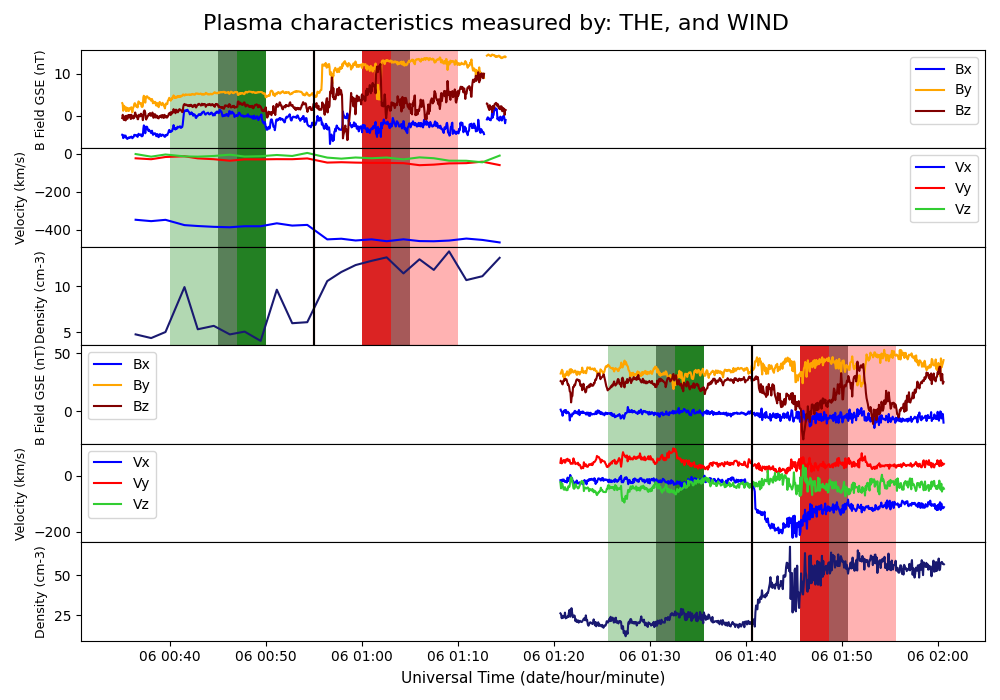

In [18]:
# ===================== plot of SW ==========================

fig_SW = plt.figure(figsize=(10, 7))
gs_SW = fig_SW.add_gridspec(6, hspace=0)
axes_SW = gs_SW.subplots(sharex=True, sharey=False)

plt.xlabel('Universal Time (date/hour/minute)',fontsize = 11)

axes_SW[0].plot(time_mag_SW, Bx_SW, color='blue', label = 'Bx')
axes_SW[0].plot(time_mag_SW, By_SW, color='orange', label = 'By')
axes_SW[0].plot(time_mag_SW, Bz_SW, color='maroon', label = 'Bz')
axes_SW[0].legend()
axes_SW[0].axvline(time_shock_SW, c = 'red')
axes_SW[0].set_ylabel('B Field GSE (nT)', fontsize = 9)
func.plot_line(time_up_SW,time_down_SW,up_window_SW,down_window_SW, up_shk_SW, dw_shk_SW,time_shock_SW,ax=axes_SW[0])


axes_SW[1].plot(time_velo_SW, Vx_SW, color='blue', label = 'Vx')
axes_SW[1].plot(time_velo_SW, Vy_SW, color='red', label = 'Vy')
axes_SW[1].plot(time_velo_SW, Vz_SW, color ='limegreen' ,label = 'Vz')
axes_SW[1].legend()
axes_SW[1].axvline(time_shock_SW, c = 'red')
axes_SW[1].set_ylabel('Velocity (km/s)', fontsize = 9)
func.plot_line(time_up_SW,time_down_SW,up_window_SW,down_window_SW, up_shk_SW, dw_shk_SW,time_shock_SW,ax=axes_SW[1])


axes_SW[2].plot(time_rho_SW, Rho_SW, color='midnightblue')
axes_SW[2].axvline(time_shock_SW, c = 'red')
axes_SW[2].set_ylabel('Density (cm-3)', fontsize = 9)
func.plot_line(time_up_SW,time_down_SW,up_window_SW,down_window_SW, up_shk_SW, dw_shk_SW,time_shock_SW,ax=axes_SW[2])

fig_SW.suptitle(f'Plasma characteristics measured by: {name_spacecraft_SW}', fontsize = 16)
plt.tight_layout()


# ================ plot of msh =======================

#fig_msh = plt.figure(figsize=(8, 6))
#gs_msh = fig_msh.add_gridspec(3, hspace=0)
#axes_msh = gs_msh.subplots(sharex=True, sharey=False)

#plt.xlabel('Universal Time (date/hour/minute)',fontsize = 11)

axes_SW[3].plot(time_mag_msh, Bx_msh, color='blue', label = 'Bx')
axes_SW[3].plot(time_mag_msh, By_msh, color='orange', label = 'By')
axes_SW[3].plot(time_mag_msh, Bz_msh, color='maroon', label = 'Bz')
axes_SW[3].legend()
axes_SW[3].axvline(time_shock_msh, c = 'red')
axes_SW[3].set_ylabel('B Field GSE (nT)', fontsize = 9)
func.plot_line(time_up_msh,time_down_msh,up_window_msh,down_window_msh, up_shk_msh, dw_shk_msh,time_shock_msh,ax=axes_SW[3])


axes_SW[4].plot(time_velo_msh, Vx_msh, color='blue', label = 'Vx')
axes_SW[4].plot(time_velo_msh, Vy_msh, color='red', label = 'Vy')
axes_SW[4].plot(time_velo_msh, Vz_msh, color ='limegreen' ,label = 'Vz')
axes_SW[4].legend()
axes_SW[4].axvline(time_shock_msh, c = 'red')
axes_SW[4].set_ylabel('Velocity (km/s)', fontsize = 9)
func.plot_line(time_up_msh,time_down_msh,up_window_msh,down_window_msh, up_shk_msh, dw_shk_msh,time_shock_msh,ax=axes_SW[4])


axes_SW[5].plot(time_rho_msh, Rho_msh, color='midnightblue')
axes_SW[5].axvline(time_shock_msh, c = 'red')
axes_SW[5].set_ylabel('Density (cm-3)', fontsize = 9)
func.plot_line(time_up_msh,time_down_msh,up_window_msh,down_window_msh, up_shk_msh, dw_shk_msh,time_shock_msh,ax=axes_SW[5])

fig_SW.suptitle(f'Plasma characteristics measured by: {name_spacecraft_msh}, and {name_spacecraft_SW} ', fontsize = 16)
plt.tight_layout()

# append the list for chris in a json file

In [19]:
def mag(x):
    a = np.sqrt(np.dot(x,x))
    
    return a


u_sw = [Vx_up_SW,Vy_up_SW,Vz_up_SW]

#additive hypothesis
V_minus_U_SW = mean_values_velocity_SW[3] - mag(u_sw)
V_minus_U_msh = mean_values_velocity_msh[3] - mag(u_msh)

#print the hypothesis
print('additive: ', V_minus_U_SW-V_minus_U_msh)
print("")

#print both side (SW and msh)
print('Vsw - Usw:', V_minus_U_SW) 
print('Vmsh - Umsh:', V_minus_U_msh)
print("")

#print the different componenet
print('Usw:', mag(u_sw))
print('Umsh:', mag(u_msh))
print('Vsw:', mean_values_velocity_SW[3])
print('Vmsh:', mean_values_velocity_msh[3])

additive:  1.5785677730317218

Vsw - Usw: 111.79177238460522
Vmsh - Umsh: 110.2132046115735

Usw: 384.12153035627614
Umsh: 71.81517023306054
Vsw: 495.91330274088136
Vmsh: 182.02837484463404


In [20]:
answer = input("Do you want to save the files ?:")

Do you want to save the files ?: no


In [21]:
import json

def create_or_append_shock_json(file_name, index_number, date, s1, t1, s2, t3, density, density_error, u_sw, u_sw_err, B_sw, B_sw_err, Shock_methods):
    try:
        with open(file_name, 'r') as file:
            file_array = json.load(file)
    except (FileNotFoundError, json.JSONDecodeError):
        file_array = []

    index_number = len(file_array) + 1

    new_data = {
        str(index_number): {
            "Date": date,
            "S1": s1,
            "t1": t1,
            "S2": s2,
            "t3": t3,
            "Density": [density, density_error],
            "u_sw": u_sw,
            "u_sw_err": u_sw_err,
            "B_sw": B_sw,
            "B_sw_err": B_sw_err,
            "Shock": {
                "MC": {"v_sw": Shock_methods[0][0], "normal": Shock_methods[0][1], "n_err": Shock_methods[0][2]},
                "MX1": {"v_sw": Shock_methods[1][0], "normal": Shock_methods[1][1], "n_err": Shock_methods[1][2]},
                "MX2": {"v_sw": Shock_methods[2][0], "normal": Shock_methods[2][1], "n_err": Shock_methods[2][2]},
                "MX3": {"v_sw": Shock_methods[3][0], "normal": Shock_methods[3][1], "n_err": Shock_methods[3][2]}
            }
        }
    }

    file_array.append(new_data)

    with open(file_name, 'w') as f:
        json.dump(file_array, f, indent=None, separators=(',', ':'))

In [22]:
if answer == 'y':
    
    S1_form = S1.tolist()[0]
    S2_form = S2.tolist()[0]
    u_sw = [Vx_up_SW,Vy_up_SW,Vz_up_SW]
    B_sw_err = [uncertainty_Bx_up_SW,uncertainty_By_up_SW,uncertainty_Bz_up_SW]
    B_sw = [Bx_up_SW,By_up_SW,Bz_up_SW]
    u_sw_err = [uncertainty_Vx_up_SW,uncertainty_Vy_up_SW,uncertainty_Vz_up_SW]
    
    Shock_methods = [ [[mean_values_velocity_SW[0],uncertainty_velocity_MC_SW], mean_values_normal_SW[0].tolist(), uncertainty_MC_SW.tolist()],
                   [[mean_values_velocity_SW[1],uncertainty_velocity_MX1_SW], mean_values_normal_SW[1].tolist(), uncertainty_MX1_SW.tolist()],
                   [[mean_values_velocity_SW[2],uncertainty_velocity_MX2_SW], mean_values_normal_SW[2].tolist(), uncertainty_MX2_SW.tolist()],
                   [[mean_values_velocity_SW[3],uncertainty_velocity_MX3_SW], mean_values_normal_SW[3].tolist(), uncertainty_MX3_SW.tolist()]
                 ]
    create_or_append_shock_json(name_file,index,form_date,S1_form,form_t1_chris,S2_form,form_t3_chris,density_up_mean_SW,uncertainty_density_x_up_SW,u_sw,u_sw_err,B_sw,B_sw_err,Shock_methods)